In [78]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#Problem 1 -Data Exploration
# Load the dataset
data = pd.read_csv( '/content/drive/MyDrive/Assignment/Datasets/WHR-2024-5CS037.csv')

# 1. Dataset Overview
# 1.1 Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# 1.2 Identify the number of rows and columns
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

# 1.3 List all columns and their data types
print("Columns and their data types:")
print(data.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [81]:
# 2. Basic Statistics
# 2.1 Calculate mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print("Basic statistics of the given datasets:\n")
print(f"-> Mean Score: {mean_score:.3f}, \n-> Median Score: {median_score:.3f}, \n-> Standard Deviation: {std_score:.3f}\n")

# 2.2 Identify the country with the highest and lowest happiness scores
max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"-> Country with highest score: {max_score_country}")
print(f"-> Country with lowest score: {min_score_country}")

Basic statistics of the given datasets:

-> Mean Score: 5.528, 
-> Median Score: 5.785, 
-> Standard Deviation: 1.171

-> Country with highest score: Finland
-> Country with lowest score: Afghanistan


In [82]:
# 3. Missing Values
# 3.1 Check for missing values
data_missing = data.isnull().sum()
print("Missing values per column:")
print(data_missing)

Missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [83]:
# 4. Filtering and Sorting
# 4.1 Filter dataset for Score > 7.5
filtered_data = data[data['score'] > 7.5]
print("*Filtered Datasets i.e the Score > 7.5")
print(filtered_data)
# 4.2 Sort by GDP per Capita in descending order and display the top 10 rows
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("*Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_data.head(10))

*Filtered Datasets i.e the Score > 7.5
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
*Top 10 countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               

In [84]:
# 5. Adding New Columns
# 5.1 Create Happiness Category column
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("Happiness categories added:")
print(data[['Country name', 'score', 'Happiness Category']].head())

Happiness categories added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


<ipython-input-85-0a6f558f55bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='viridis')


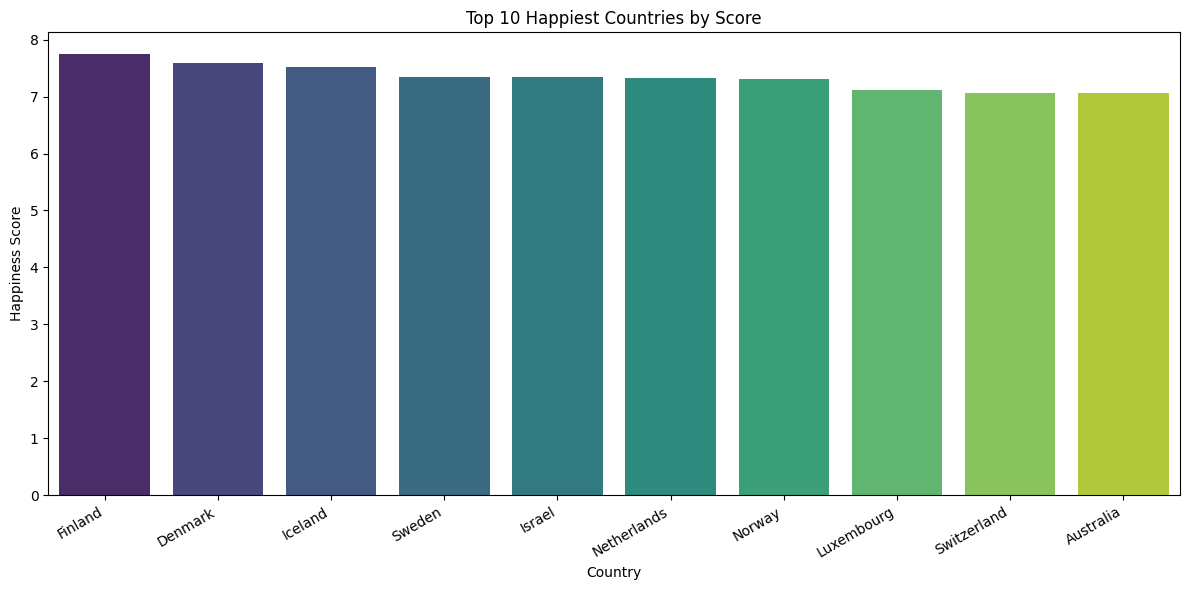

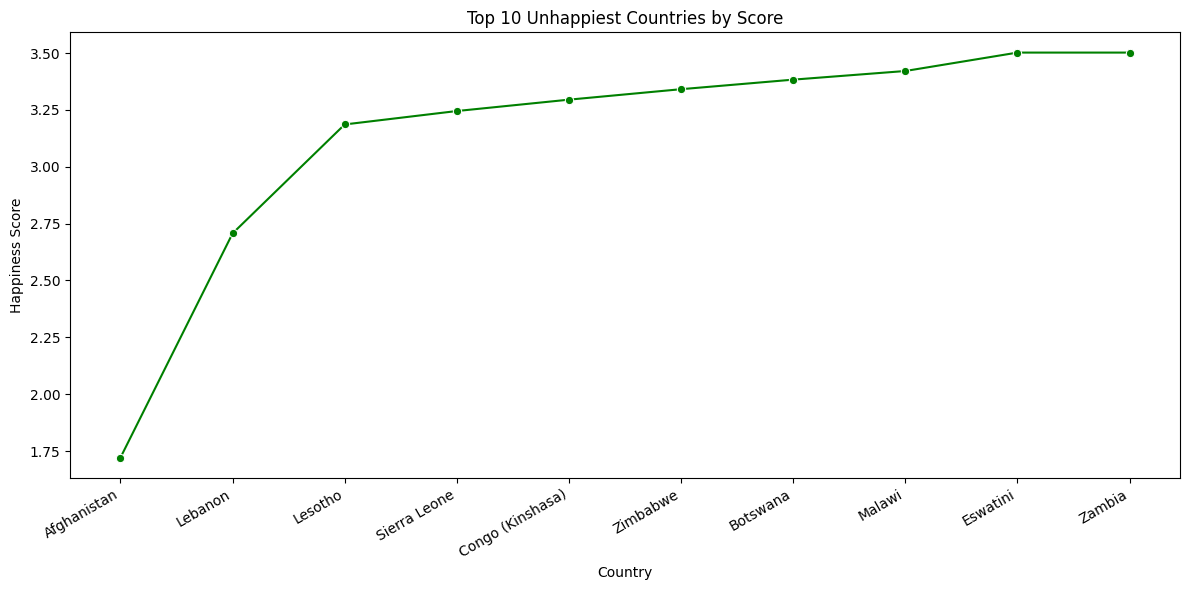

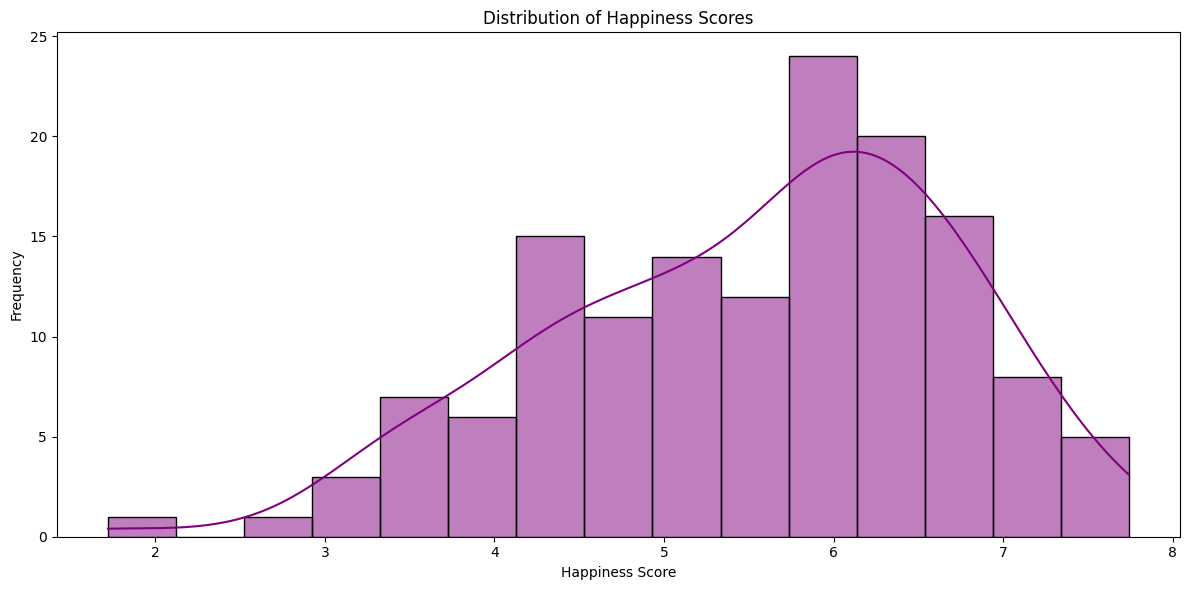

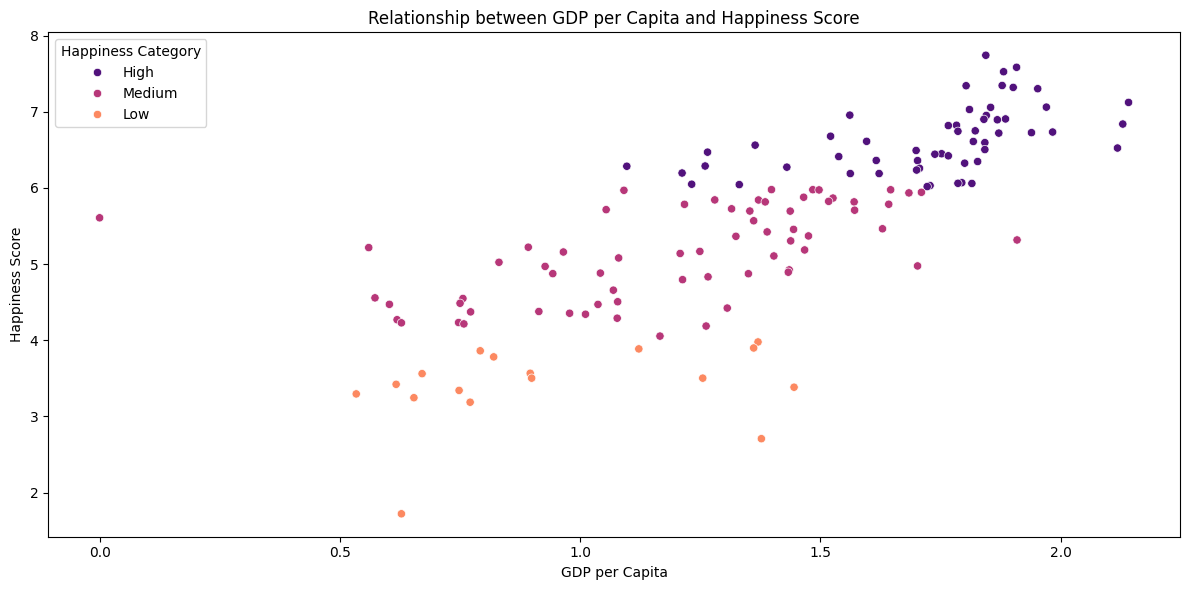

In [85]:
# 6. Data Visualizations

# 6.1 Bar Plot: Top 10 happiest countries by Score
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 6.2 Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = data.sort_values(by='score').head(10)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='green')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 6.3 Histogram for the Score column
plt.figure(figsize=(12, 6))
sns.histplot(data['score'], kde=True, color='purple', bins=15)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6.4 Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='magma')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


In [86]:
#Problem 2-Advance Data Exploration Task
# 1. Preparing the South-Asia Datasets:

# 1.1 Define South-Asian Countries:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
# 1.2
data = pd.read_csv('/content/drive/MyDrive/Assignment/Datasets/WHR-2024-5CS037.csv')

# Filter to include only South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered dataframe to a new CSV file
south_asia_data.to_csv("south_asian_countries.csv", index=False)
print(south_asia_data.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774


<ipython-input-87-e313e07ecd59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (
<ipython-input-87-e313e07ecd59>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='Composite Score', data=top_5, palette='viridis')


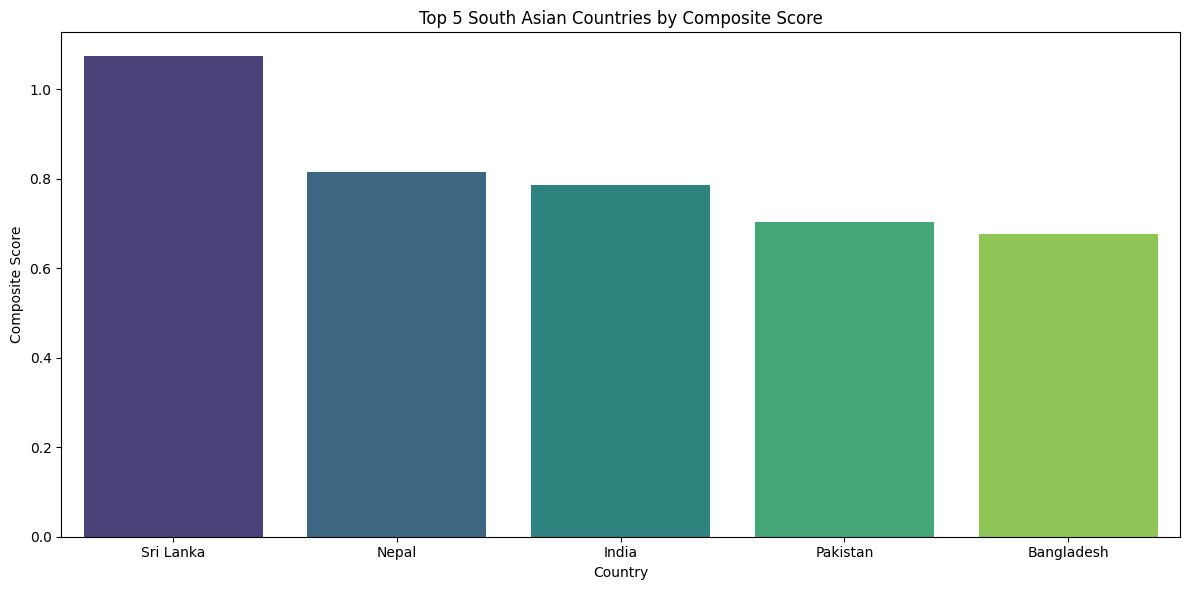

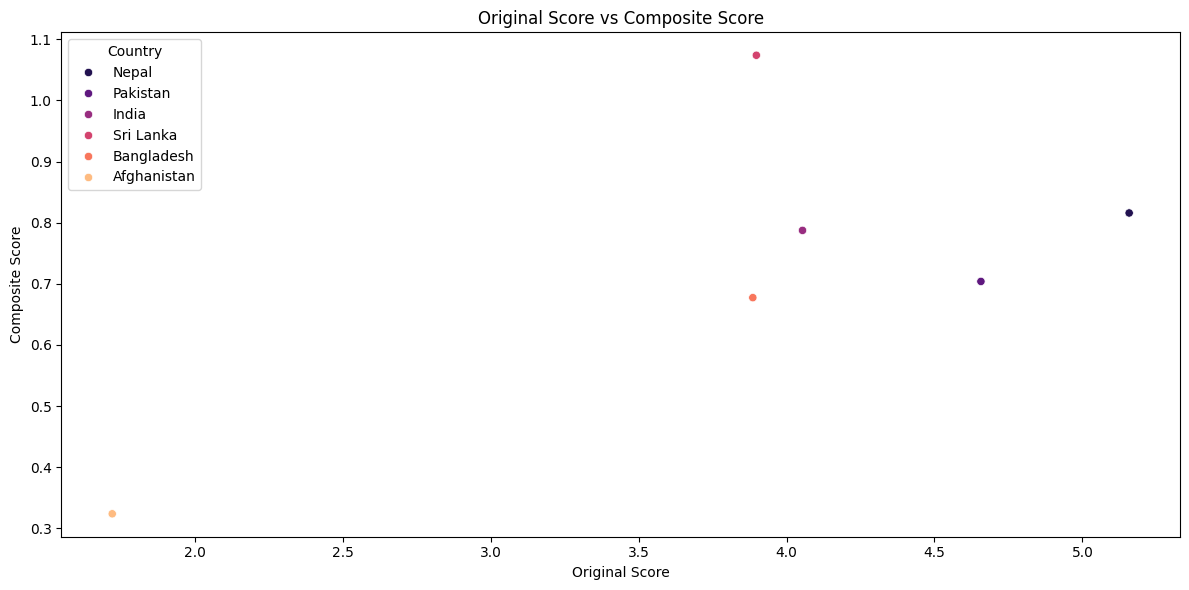

In [87]:

# 2.1: Create a Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# 2.2: Rank Countries based on Composite Score
ranked_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Display the top 5 ranked countries
top_5 = ranked_data.head(5)
print(top_5[['Country name', 'Composite Score']])

# 2.3: Visualize Top 5 Countries (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='Composite Score', data=top_5, palette='viridis')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Country')
plt.ylabel('Composite Score')
plt.tight_layout()  
plt.show()

# 2.4: Compare Composite Score vs Original Score (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_data, hue='Country name', palette='magma')
plt.title('Original Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.legend(title='Country',  loc='upper left')
plt.tight_layout()
plt.show()


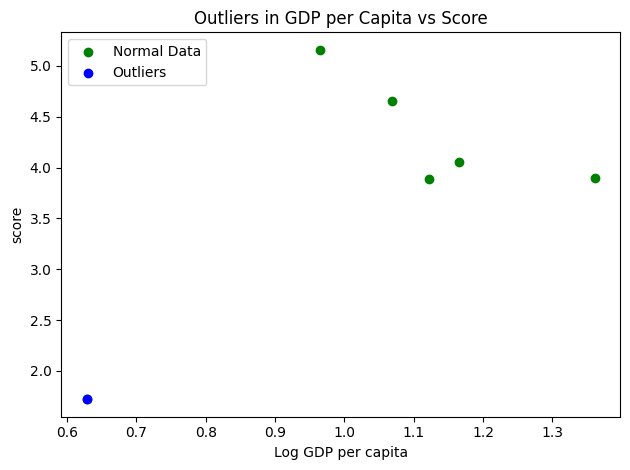

In [88]:

# Task 3 - Outlier Detection

# 3.1: Identify Outliers Using 1.5 * IQR Rule
Q1 = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3 = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = south_asia_data[(south_asia_data['Log GDP per capita'] < lower_bound) |
                          (south_asia_data['Log GDP per capita'] > upper_bound)]

# 3.2: Scatter Plot Highlighting Outliers
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], label='Normal Data', color='green')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], label='Outliers', color='blue')
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.title('Outliers in GDP per Capita vs Score')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Correlation between Freedom to Make Life Choices and Score: 0.8005
Correlation between Generosity and Score: 0.8745


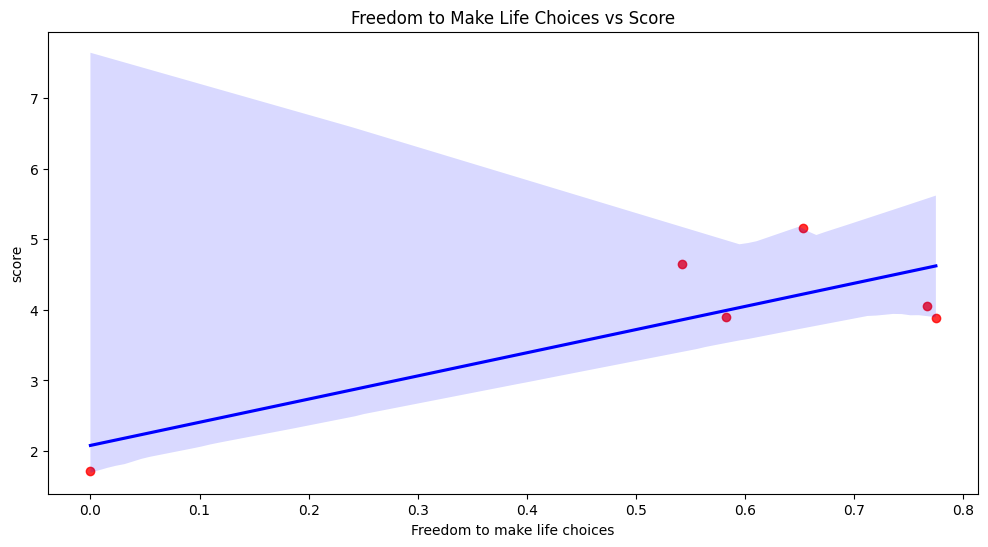

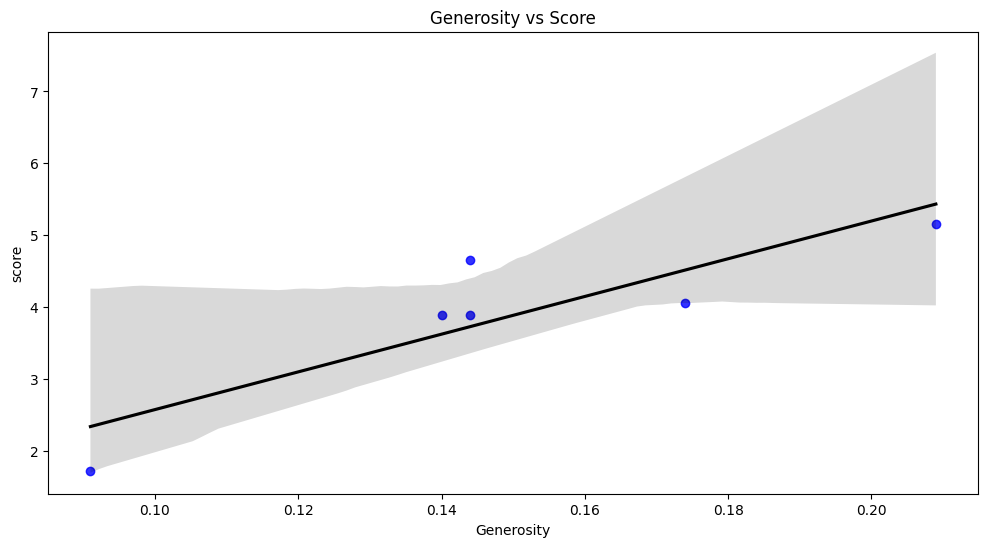

In [89]:
#Task4
# 4.1: Calculate Pearson Correlation
correlation_freedom = south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
correlation_generosity = south_asia_data['Generosity'].corr(south_asia_data['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {correlation_freedom:.4f}")
print(f"Correlation between Generosity and Score: {correlation_generosity:.4f}")

# 4.2: Scatter Plots with Trendlines
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Freedom to Make Life Choices vs Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_data, scatter_kws={'color':'blue'}, line_kws={'color':'black'})
plt.title('Generosity vs Score')
plt.show()

<ipython-input-90-2635fe943c51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


Top 3 Positive GDP-Score Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
Top 3 Negative GDP-Score Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


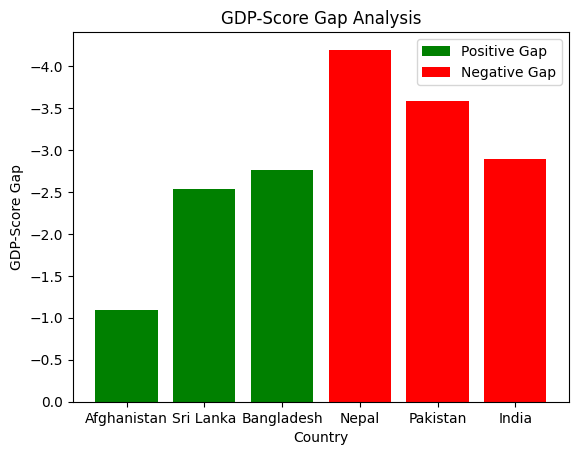

In [90]:
# Task5: Gap Analysis:

# 5.1: Calculate GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# 5.2: Rank Countries by GDP-Score Gap
ranked_gap_asc = south_asia_data.sort_values(by='GDP-Score Gap')
ranked_gap_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

# Display top 3 positive and negative gaps
top_positive_gap = ranked_gap_desc.head(3)
top_negative_gap = ranked_gap_asc.head(3)

print("Top 3 Positive GDP-Score Gaps:")
print(top_positive_gap[['Country name', 'GDP-Score Gap']])

print("Top 3 Negative GDP-Score Gaps:")
print(top_negative_gap[['Country name', 'GDP-Score Gap']])

# Step 3: Visualize Gaps (Flipping the Graph)
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='green', label='Positive Gap')
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='red', label='Negative Gap')

plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('GDP-Score Gap Analysis')

# Flip the y-axis (make the graph upside down)
plt.gca().invert_yaxis()

plt.legend()
plt.show()


In [91]:
#Problem 3: Comparative Analysis:

#Task 1: Setup Task- Preparing the Middle Eastern Datasets.
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
                         "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Create Region DataFrames
south_asia_data = data[data['Country name'].isin(south_asia_countries)]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print(middle_east_data.head())


            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual  
4                       0.193                2.298  
12                      0.17

In [92]:
## Task 2: Descriptive Statistics
print("Descriptive Statistics:\n")
for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    mean_score = region_data['score'].mean()
    std_score = region_data['score'].std()
    print(f"{region} - Mean Score: {mean_score:.3f}, Std Dev: {std_score:.3f}")

# Compare Mean Scores
if south_asia_data['score'].mean() > middle_east_data['score'].mean():
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

Descriptive Statistics:

South Asia - Mean Score: 3.896, Std Dev: 1.177
Middle East - Mean Score: 5.412, Std Dev: 1.566
Middle East has a higher average happiness score.



South Asia - Top 3:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
South Asia - Bottom 3:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898


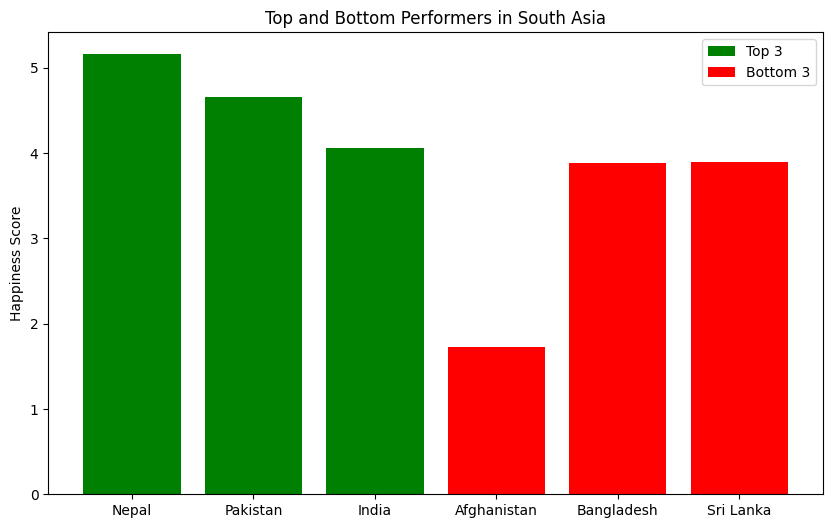


Middle East - Top 3:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Middle East - Bottom 3:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


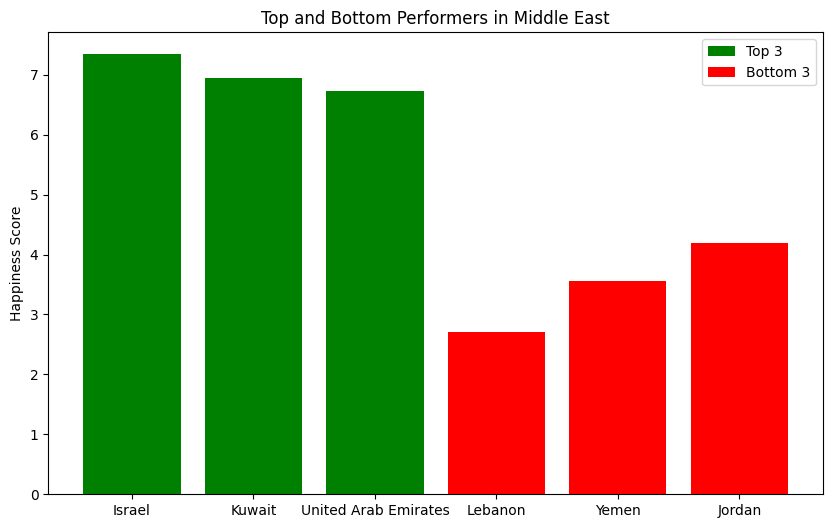

In [93]:
# Task 3: Top and Bottom Performers
for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    top_3 = region_data.nlargest(3, 'score')[['Country name', 'score']]
    bottom_3 = region_data.nsmallest(3, 'score')[['Country name', 'score']]
    print(f"\n{region} - Top 3:\n{top_3}")
    print(f"{region} - Bottom 3:\n{bottom_3}")

    # Plot Bar Charts
    plt.figure(figsize=(10, 6))
    plt.bar(top_3['Country name'], top_3['score'], color='green', label='Top 3')
    plt.bar(bottom_3['Country name'], bottom_3['score'], color='red', label='Bottom 3')
    plt.title(f"Top and Bottom Performers in {region}")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.show()


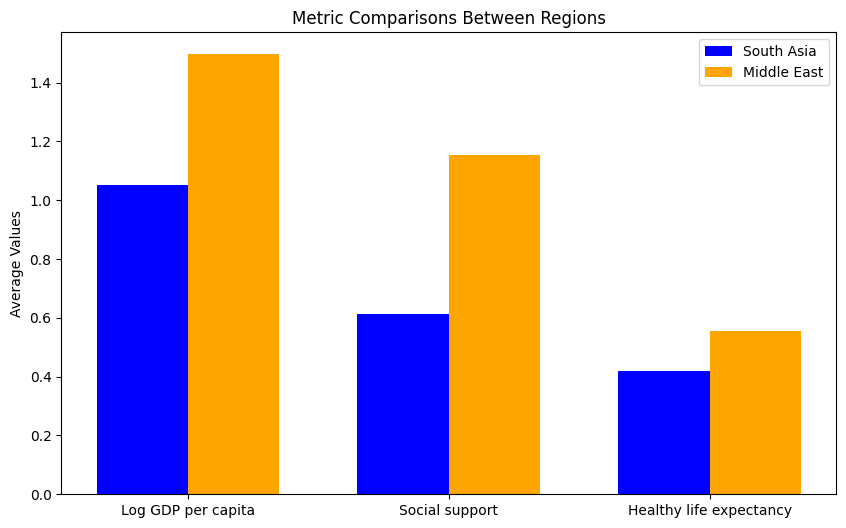

In [94]:
# Task 4: Metric Comparisons
# Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_sa = south_asia_data[metrics].mean()
mean_metrics_me = middle_east_data[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, mean_metrics_sa, width, label='South Asia', color='blue')
ax.bar(x + width/2, mean_metrics_me, width, label='Middle East', color='orange')

ax.set_ylabel('Average Values')
ax.set_title('Metric Comparisons Between Regions')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

In [95]:
# Task 5: Happiness Disparity
for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    score_range = region_data['score'].max() - region_data['score'].min()
    cv = region_data['score'].std() / region_data['score'].mean()
    print(f"\n{region} - Score Range: {score_range:.2f}, Coefficient of Variation: {cv:.4f}")


South Asia - Score Range: 3.44, Coefficient of Variation: 0.3021

Middle East - Score Range: 4.63, Coefficient of Variation: 0.2894



South Asia - Correlation Analysis:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  


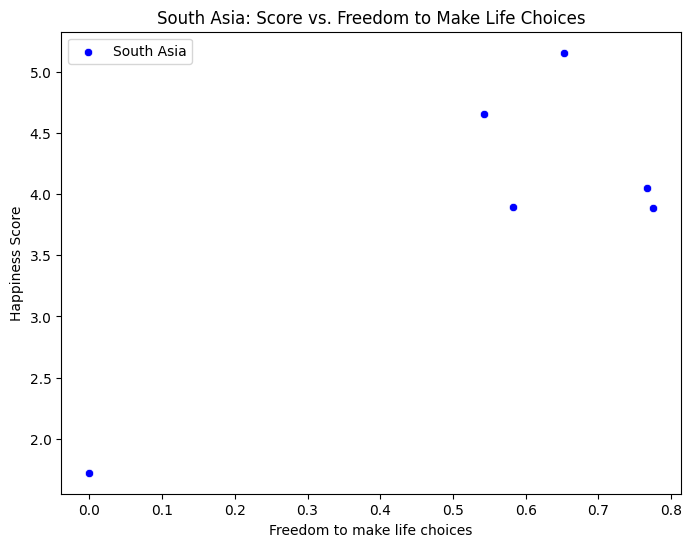

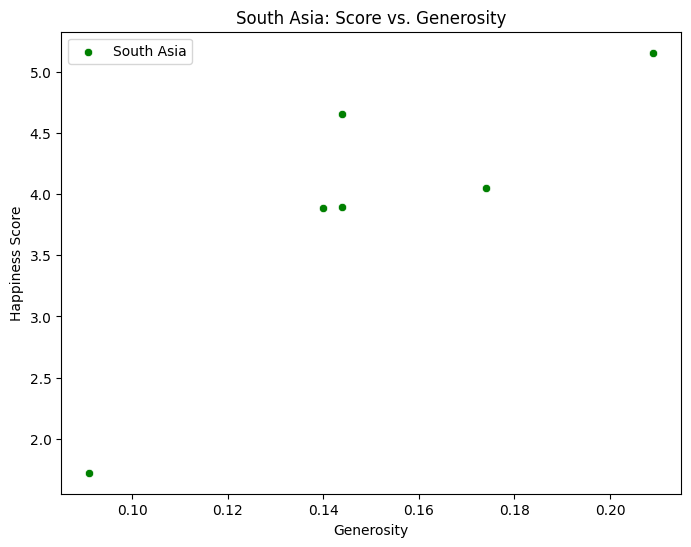


Middle East - Correlation Analysis:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


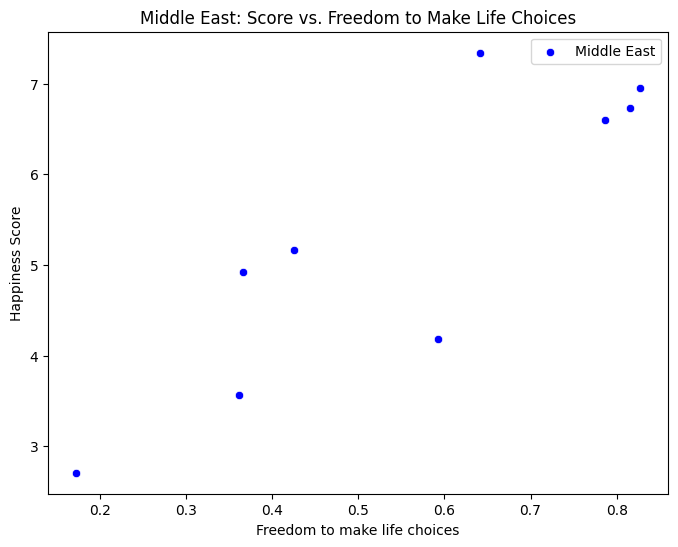

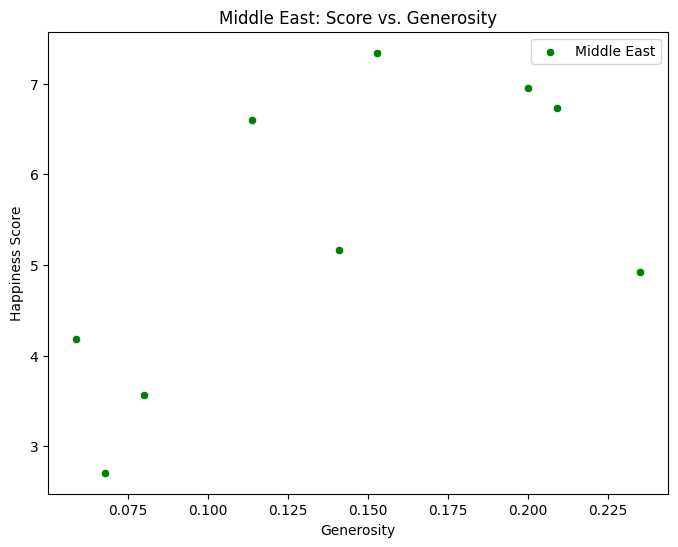

In [96]:
# Task 6: Correlation Analysis - Scatter Plots for South Asia and Middle East

for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    print(f"\n{region} - Correlation Analysis:")
    correlation = region_data[['score', 'Freedom to make life choices', 'Generosity']].corr()
    print(correlation)

    # Scatter Plot for 'Freedom to Make Life Choices' vs. 'Score'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=region_data, x='Freedom to make life choices', y='score', color='blue', label=f'{region}')
    plt.title(f"{region}: Score vs. Freedom to Make Life Choices")
    plt.xlabel("Freedom to make life choices")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.show()

    # Scatter Plot for 'Generosity' vs. 'Score'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=region_data, x='Generosity', y='score', color='green', label=f'{region}')
    plt.title(f"{region}: Score vs. Generosity")
    plt.xlabel("Generosity")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.show()



South Asia - Outliers in Score:
    Country name  score
142  Afghanistan  1.721


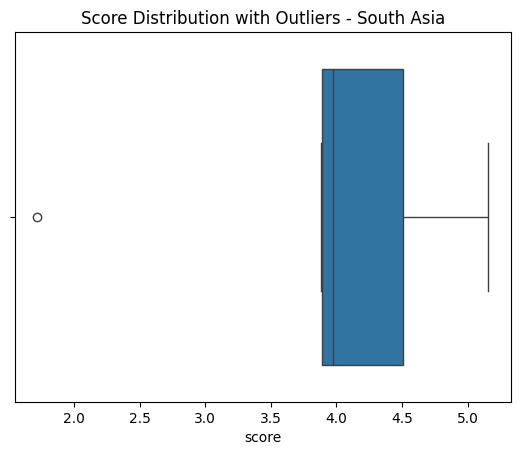


Middle East - Outliers in Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


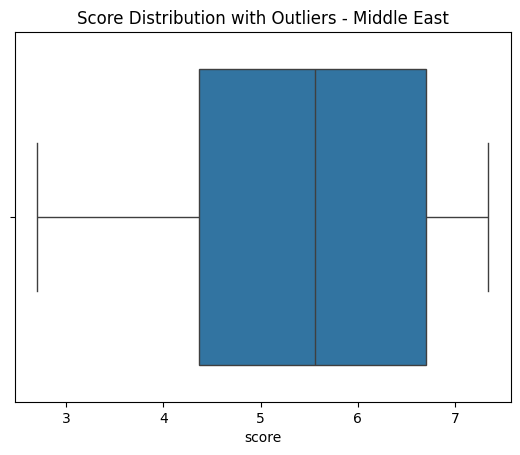


South Asia - Outliers in Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


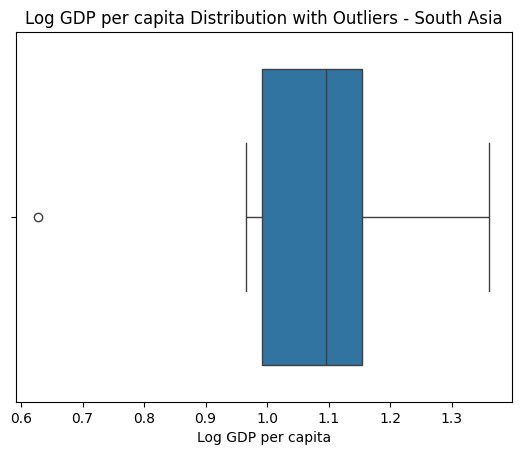


Middle East - Outliers in Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


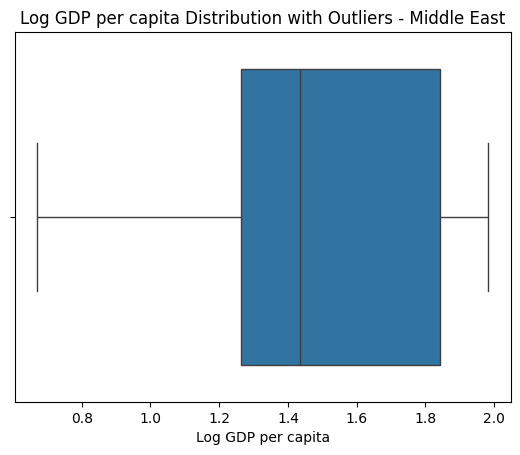

In [97]:
#Task7
# Outlier detection for "score"
for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    q1 = region_data['score'].quantile(0.25)
    q3 = region_data['score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = region_data[(region_data['score'] < lower_bound) | (region_data['score'] > upper_bound)]

    print(f"\n{region} - Outliers in Score:\n{outliers[['Country name', 'score']]}")

    sns.boxplot(data=region_data, x='score')
    plt.title(f"Score Distribution with Outliers - {region}")
    plt.show()

# Outlier detection for "Log GDA per capita"
for region, region_data in zip(["South Asia", "Middle East"], [south_asia_data, middle_east_data]):
    q1 = region_data['Log GDP per capita'].quantile(0.25)
    q3 = region_data['Log GDP per capita'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = region_data[(region_data['Log GDP per capita'] < lower_bound) | (region_data['Log GDP per capita'] > upper_bound)]

    print(f"\n{region} - Outliers in Log GDP per capita:\n{outliers[['Country name', 'Log GDP per capita']]}")

    sns.boxplot(data=region_data, x='Log GDP per capita')
    plt.title(f"Log GDP per capita Distribution with Outliers - {region}")
    plt.show()


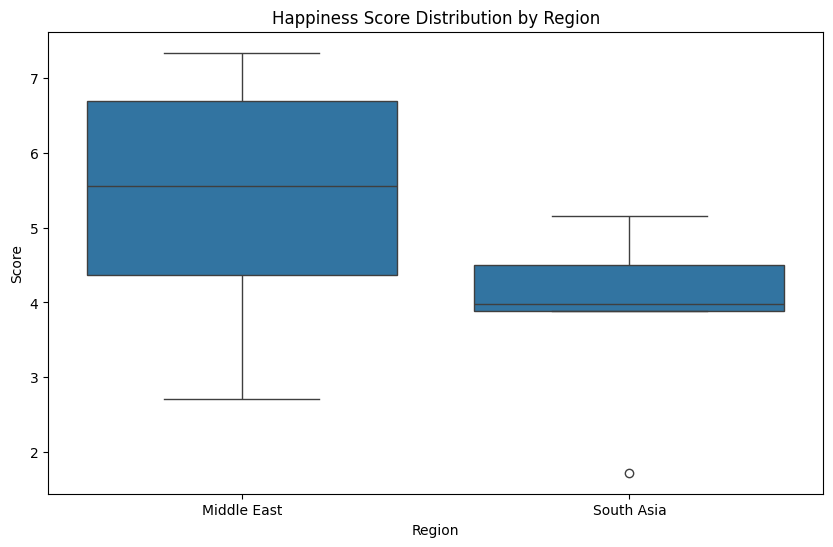

In [98]:
#Task7

plt.figure(figsize=(10, 6))

# Create a 'region' column in the filtered DataFrame
filtered_data = data[data['Country name'].isin(south_asia_countries + middle_east_countries)].copy()
filtered_data['region'] = filtered_data['Country name'].apply(lambda country: 'South Asia' if country in south_asia_countries else 'Middle East')

sns.boxplot(data=filtered_data, x='region', y='score')
plt.title("Happiness Score Distribution by Region")
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()